__Chapter 3 Problems__

In [1]:
from math import sqrt
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

***
__Question 3.1__
> If GE has an annual risk of 27.4 percent, what is the volatility of monthly GE returns?

In [2]:
σₑ = 0.274
σₘ = σₑ/sqrt(12)
print(f'Monthly volatility of GE returns, σₘ = {σₘ:.2%}')

Monthly volatility of GE returns, σₘ = 7.91%


***
__Question 3.2__
> Stock A has 25 percent risk, stock B has 50 percent risk, and their returns are 50 percent correlated. What fully invested portfolio of A and B has minimum total risk? _(Hint try solving graphically (e.g. in Excel), if you cannot determine the answer mathematically.)_

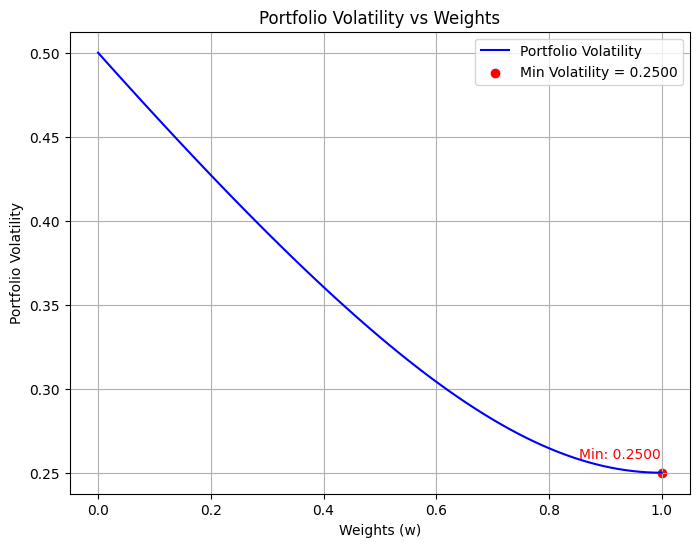

Optimal weight: 1.0000
Minimum portfolio volatility: 0.2500


In [3]:
σₐ, σᵦ, ρₐᵦ = 0.25, 0.5, 0.5

def two_portfolio_volatility(w, σₐ, σᵦ, ρₐᵦ):
    return sqrt( (w*σₐ)**2 + ((1-w)*σᵦ)**2 + 2*w*σₐ*(1-w)*σᵦ*ρₐᵦ )

steps = np.linspace(0, 1, 101)
volatilities = [two_portfolio_volatility(w, σₐ, σᵦ, ρₐᵦ) for w in steps]

# 1. graphically solve
min_volatility = min(volatilities)
min_w = steps[volatilities.index(min_volatility)]

plt.figure(figsize=(8, 6))
plt.plot(steps, volatilities, label='Portfolio Volatility', color='blue')
plt.scatter(min_w, min_volatility, color='red', label=f'Min Volatility = {min_volatility:.4f}')
plt.annotate(f'Min: {min_volatility:.4f}', (min_w, min_volatility), textcoords="offset points", xytext=(-30, 10), ha='center', color='red')
plt.xlabel('Weights (w)')
plt.ylabel('Portfolio Volatility')
plt.title('Portfolio Volatility vs Weights')
plt.grid(True)
plt.legend()
plt.show()

# 2. use solver to solve
bounds = [(0, 1)]
initial_guess = [0.5]
result = minimize(lambda w: two_portfolio_volatility(w[0], σₐ, σᵦ, ρₐᵦ), initial_guess, bounds=bounds)
optimal_w = result.x[0]
min_volatility = result.fun

print(f"Optimal weight: {optimal_w:.4f}")
print(f"Minimum portfolio volatility: {min_volatility:.4f}")

***
__Question 3.3__
> What is the risk of an equal-weighted portfolio consisting of five stocks, each with 35 percent volatility and a 50 percent correlation with all other stocks? How does that increase as the portfolio increases to 20 stocks or 100 stocks?

Portfolio volatility (N=5) = 27.11%


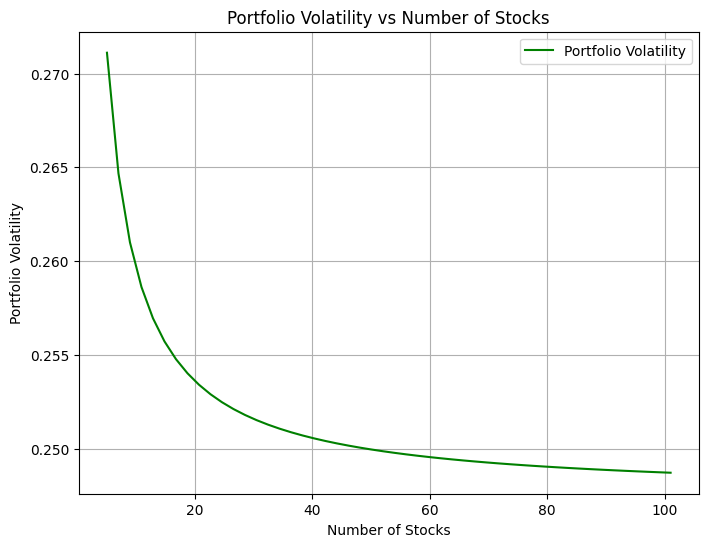

In [4]:
n = 5
σ = 0.35
ρ = 0.5

def portfolio_volatility(n, σ, ρ):
    return σ * sqrt( (1 + ρ*(n-1))/n )

print(f'Portfolio volatility (N=5) = {portfolio_volatility(n,σ,ρ):.2%}')

num_stocks = np.linspace(5, 101)
vols = [portfolio_volatility(n, σ, ρ) for n in num_stocks]

# Plotting vols against num_stocks
plt.figure(figsize=(8, 6))
plt.plot(num_stocks, vols, label='Portfolio Volatility', color='green')
plt.xlabel('Number of Stocks')
plt.ylabel('Portfolio Volatility')
plt.title('Portfolio Volatility vs Number of Stocks')
plt.grid(True)
plt.legend()
plt.show()

***
__Question 3.4__
> How do structural risk models help in estimating asset betas? How do these betas differ from those estimated from a 60-month beta regression?



_Structural risk models decompose risk into_
 - total risk
 - active risk
 - market (or benchmark)
 - residual risk

_Structural risk models reduce considerably_<br>
 (e.g. compared to e.g. the 60-month beta regression)! The size of the variances / co-variances by grouping stocks to a manageable number of standard (e.g. ~ 70) factors.
 - stocks change
 - factors do not change

_Historical regressions have the following problems_
 - relying on T periods to estimate N by N covariance matrix requires short time periods while forecast horizons are often one quarter to one year
 - cant deal with changing nature of company (mergers / splits)
 - selection bias as takeovers / failed companies omitted
 - sample bias will lead to some gross mis-estimates of co-variances (e.g. 500 x 500 co-var if 5% of estimates poor that's 6262 poor estimates)

